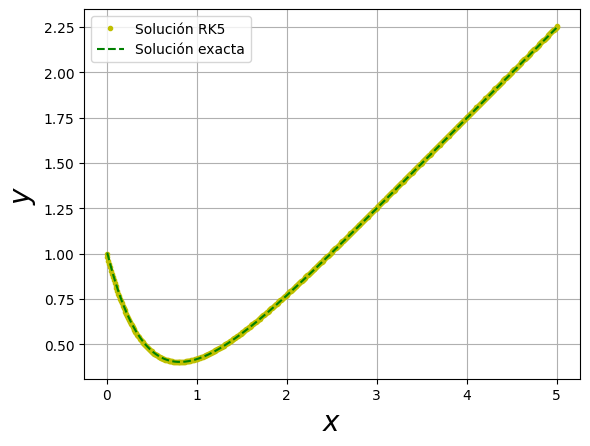

In [15]:
"""
Nombre: Samuel Cortes Salazar
"""


import numpy as np
import matplotlib.pyplot as plt

"""
1) Mediante la aplicación del método de Runge-Kutta de quinto orden, obtenga la solución de la ecuación diferencial:

        dy/dx + 2y = x, con y(0) = 1

  Grafique la solución obtenida en el intervalo 0 <= x <= 5 utilizando h = 0.01. Para verificar que su código es correcto, muestre su resultado junto con la solución exacta:

        y(x) = (1/4)(2x + 5e^(-2x) - 1)

"""

def f(x,y):
  return x - 2*y

def RK5(x0,y0,xmax,h):
  x = x0
  y = y0
  X=[x]
  Y_RK5=[y]
  Y_exact=[y]
  while x<=xmax:
    Y_exact.append(0.25*(2*x + 5 * np.exp(-2*x) - 1))
    k1 = f(x,y)
    k2 = f(x+0.25*h,y+0.25*k1*h)
    k3 = f(x+0.25*h,y+0.125*k1*h+0.125*k2*h)
    k4 = f(x+0.5*h,y-0.5*k2*h+k3*h)
    k5 = f(x+0.75*h,y+0.1875*k1*h+0.5625*k4*h)
    k6 = f(x+h,y-0.4286*k1*h+0.2857*k2*h+1.7143*k3*h-1.7143*k4*h+1.1429*k5*h)
    y += (7*k1+32*k3+12*k4+32*k5+7*k6)*h/90
    x += h
    X.append(x)
    Y_RK5.append(y)
  plt.plot(X,Y_RK5,'y.',label = 'Solución RK5')
  plt.plot(X,Y_exact,'g--',label = 'Solución exacta')
  plt.xlabel(r'$x$',size=20)
  plt.ylabel(r'$y$',size=20)
  plt.legend()
  plt.grid()
  plt.show()

RK5(0,1,5,0.01)


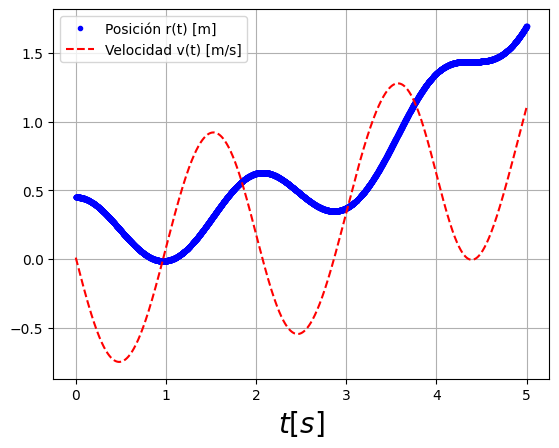

In [16]:
"""
2) Ahora adapte el método de RK5 para resolver la ecuación diferencial que describe el movimiento de una masa en una barra oscilando:

        d^2[r(t)]/dt^2 = r(t)*(\pi^(2)/12)^2*sin^2(\pi*t) - g*sin(\pi/12*cos(\pi*t)), g = 9.8 m/s^2

  Grafique la solución obtenida para r(t) en el intervalo 0 <= t <= 5 utilizando h= 0.001 y la condición inicial r(0) = 0.45 m y \dot(r)(0) = 0.01 m/s. Incluya en esta figura la velocidad \dot(r).
"""


def f(t,r,v):
  return v

def g(t,r,v):
  return r * (np.pi**2/12)**2 * np.sin(np.pi*t)**2 - 9.8*np.sin(np.pi*np.cos(np.pi*t)/12)

def RK5(t0,r0,v0,tmax,h):
  t = t0
  r = r0
  v = v0
  T = [t]
  R = [r]
  V = [v]
  while t<=tmax:
    k1r = f(t,r,v)
    k1v = g(t,r,v)
    k2r = f(t+0.25*h,r+0.25*k1r*h,v+0.25*k1v*h)
    k2v = g(t+0.25*h,r+0.25*k1r*h,v+0.25*k1v*h)
    k3r = f(t+0.25*h,r+0.125*k1r*h+0.125*k2r*h,v+0.125*k1v*h+0.125*k2v*h)
    k3v = g(t+0.25*h,r+0.125*k1r*h+0.125*k2r*h,v+0.125*k1v*h+0.125*k2v*h)
    k4r = f(t+0.5*h,r-0.5*k2r*h+k3r*h,v-0.5*k2v*h+k3v*h)
    k4v = g(t+0.5*h,r-0.5*k2r*h+k3r*h,v-0.5*k2v*h+k3v*h)
    k5r = f(t+0.75*h,r+0.1875*k1r*h+0.5625*k4r*h,v+0.1875*k1v*h+0.5625*k4v*h)
    k5v = g(t+0.75*h,r+0.1875*k1r*h+0.5625*k4r*h,v+0.1875*k1v*h+0.5625*k4v*h)
    k6r = f(t+h,r-0.4286*k1r*h+0.2857*k2r*h+1.7143*k3r*h-1.7143*k4r*h+1.1429*k5r*h,v-0.4286*k1v*h+0.2857*k2v*h+1.7143*k3v*h-1.7143*k4v*h+1.1429*k5v*h)
    k6v = g(t+h,r-0.4286*k1r*h+0.2857*k2r*h+1.7143*k3r*h-1.7143*k4r*h+1.1429*k5r*h,v-0.4286*k1v*h+0.2857*k2v*h+1.7143*k3v*h-1.7143*k4v*h+1.1429*k5v*h)
    r += (7*k1r+32*k3r+12*k4r+32*k5r+7*k6r)*h/90
    v += (7*k1v+32*k3v+12*k4v+32*k5v+7*k6v)*h/90
    t += h
    T.append(t)
    R.append(r)
    V.append(v)
  plt.plot(T,R,'b--',label = 'Posición r(t) [m]')
  plt.plot(T,V,'r--',label = 'Velocidad v(t) [m/s]')
  plt.xlabel(r'$t [s]$',size=20)
  plt.legend()
  plt.grid()
  plt.show()

RK5(0,0.45,0.01,5,0.001)